In [2]:
!pip install -q tensorflow gradio scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import gradio as gr



In [42]:

from google.colab import files
import io

print("Select your CSV file in the file chooser that appears...")
uploaded = files.upload()


filename = list(uploaded.keys())[0]
print("Uploaded filename:", filename)


df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1')
print("Loaded dataframe shape:", df.shape)
df.head(5)

Select your CSV file in the file chooser that appears...


Saving spam.csv to spam (3).csv
Uploaded filename: spam (3).csv
Loaded dataframe shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

split_index = int(len(df) * 0.8)

train_df = df[:split_index]
test_df  = df[split_index:]

X_train = train_df['text'].tolist()
y_train = train_df['label'].values

X_test  = test_df['text'].tolist()
y_test  = test_df['label'].values

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 4457
Testing samples: 1115


In [43]:
# Text Preprocessing
tokenizer = Tokenizer(num_words=None, oov_token='<unk>') # num_words=None means it will keep all words
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1 # +1 for the OOV token or padding

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = max([len(seq) for seq in X_train_sequences]) # Max length of sequences in training data

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

# Convert labels to numerical
label_map = {'ham': 0, 'spam': 1}
y_train_encoded = np.array([label_map[label] for label in y_train])
y_test_encoded = np.array([label_map[label] for label in y_test])

model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train_padded, y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


126/126 - 3s - 26ms/step - accuracy: 0.8661 - loss: 0.3896 - val_accuracy: 0.8543 - val_loss: 0.4022
Epoch 2/10
126/126 - 0s - 3ms/step - accuracy: 0.8661 - loss: 0.3757 - val_accuracy: 0.8543 - val_loss: 0.3940
Epoch 3/10
126/126 - 0s - 3ms/step - accuracy: 0.8661 - loss: 0.3680 - val_accuracy: 0.8543 - val_loss: 0.3825
Epoch 4/10
126/126 - 0s - 3ms/step - accuracy: 0.8661 - loss: 0.3508 - val_accuracy: 0.8543 - val_loss: 0.3519
Epoch 5/10
126/126 - 0s - 3ms/step - accuracy: 0.8666 - loss: 0.3002 - val_accuracy: 0.8565 - val_loss: 0.2746
Epoch 6/10
126/126 - 0s - 3ms/step - accuracy: 0.9135 - loss: 0.2002 - val_accuracy: 0.8767 - val_loss: 0.2288
Epoch 7/10
126/126 - 0s - 3ms/step - accuracy: 0.9611 - loss: 0.1284 - val_accuracy: 0.9753 - val_loss: 0.1099
Epoch 8/10
126/126 - 0s - 3ms/step - accuracy: 0.9748 - loss: 0.0911 - val_accuracy: 0.9753 - val_loss: 0.0865
Epoch 9/10
126/126 - 0s - 3ms/step - accuracy: 0.9823 - loss: 0.0651 - val_accuracy: 0.9709 - val_loss: 0.0904
Epoch 10/10

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 189, 64)        │       510,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,577 (1.96 MB)

 Trainable params: 512,577 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.9811659192825112

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.98      0.88      0.92       145

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



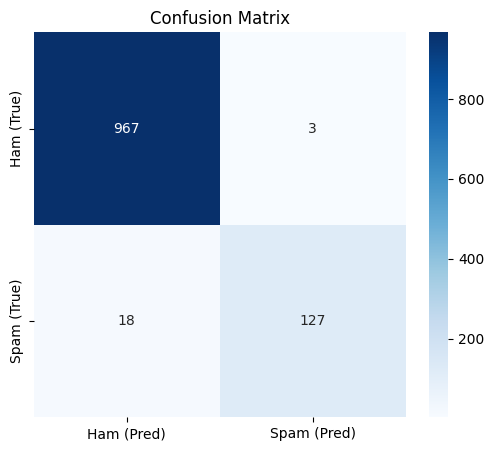

In [44]:
y_pred_prob = model.predict(X_test_padded).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred))

cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham (Pred)', 'Spam (Pred)'],
            yticklabels=['Ham (True)', 'Spam (True)'])
plt.title("Confusion Matrix")
plt.show()

In [22]:
model.save("sms_model.h5")

import json
with open("tokenizer.json", "w") as f:
    f.write(tokenizer.to_json())

print("Saved sms_model.h5 and tokenizer.json")


Saved sms_model.h5 and tokenizer.json


In [26]:
def predict_sms(text):
    txt = str(text).lower().strip()
    seq = tokenizer.texts_to_sequences([txt])
    pad = pad_sequences(seq, maxlen=max_len)

    prob = float(model.predict(pad)[0][0])
    label = "spam" if prob >= 0.5 else "ham (legit)"
    confidence = prob if prob >= 0.5 else 1 - prob

    return {
        "prediction": label,
        "probability_spam": f"{prob:.4f}",
        "confidence": f"{confidence:.2%}"
    }


In [39]:
import gradio as gr

def predict_sms(text):
    seq = tokenizer.texts_to_sequences([text])
    max_len = model.input_shape[1]
    padded = pad_sequences(seq, maxlen=max_len, padding='post')

    pred = model.predict(padded)[0][0]

    prediction = "SPAM / FAKE" if pred > 0.5 else "HAM / LEGIT"
    confidence = pred if pred > 0.5 else (1 - pred)

    return prediction, str(pred), str(confidence)


gui = gr.Interface(
    fn=predict_sms,
    inputs=gr.Textbox(lines=3, label="Enter SMS Message"),
    outputs=[
        gr.Label(label="Prediction"),
        gr.Textbox(label="Spam Probability"),
        gr.Textbox(label="Confidence")
    ],
    title="SMS Spam / Legit Checker (ANN Model)",
    description="Paste an SMS and click Submit."
)

gui.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://daf7e5851e7e8a231e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [30]:
from google.colab import files
files.download("sms_model.h5")
files.download("tokenizer.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>